<a href="https://colab.research.google.com/github/shaliha223/DSA_class_activities/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y.shape

(569,)

In [4]:
df.shape

(569, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>],
       [<Axes: title={'center': 'mean compactness'}>,
        <Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>],
       [<Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>,
        <Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>],
       [<Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>,
        <Axes: title={'center': 'symmetry error'}>

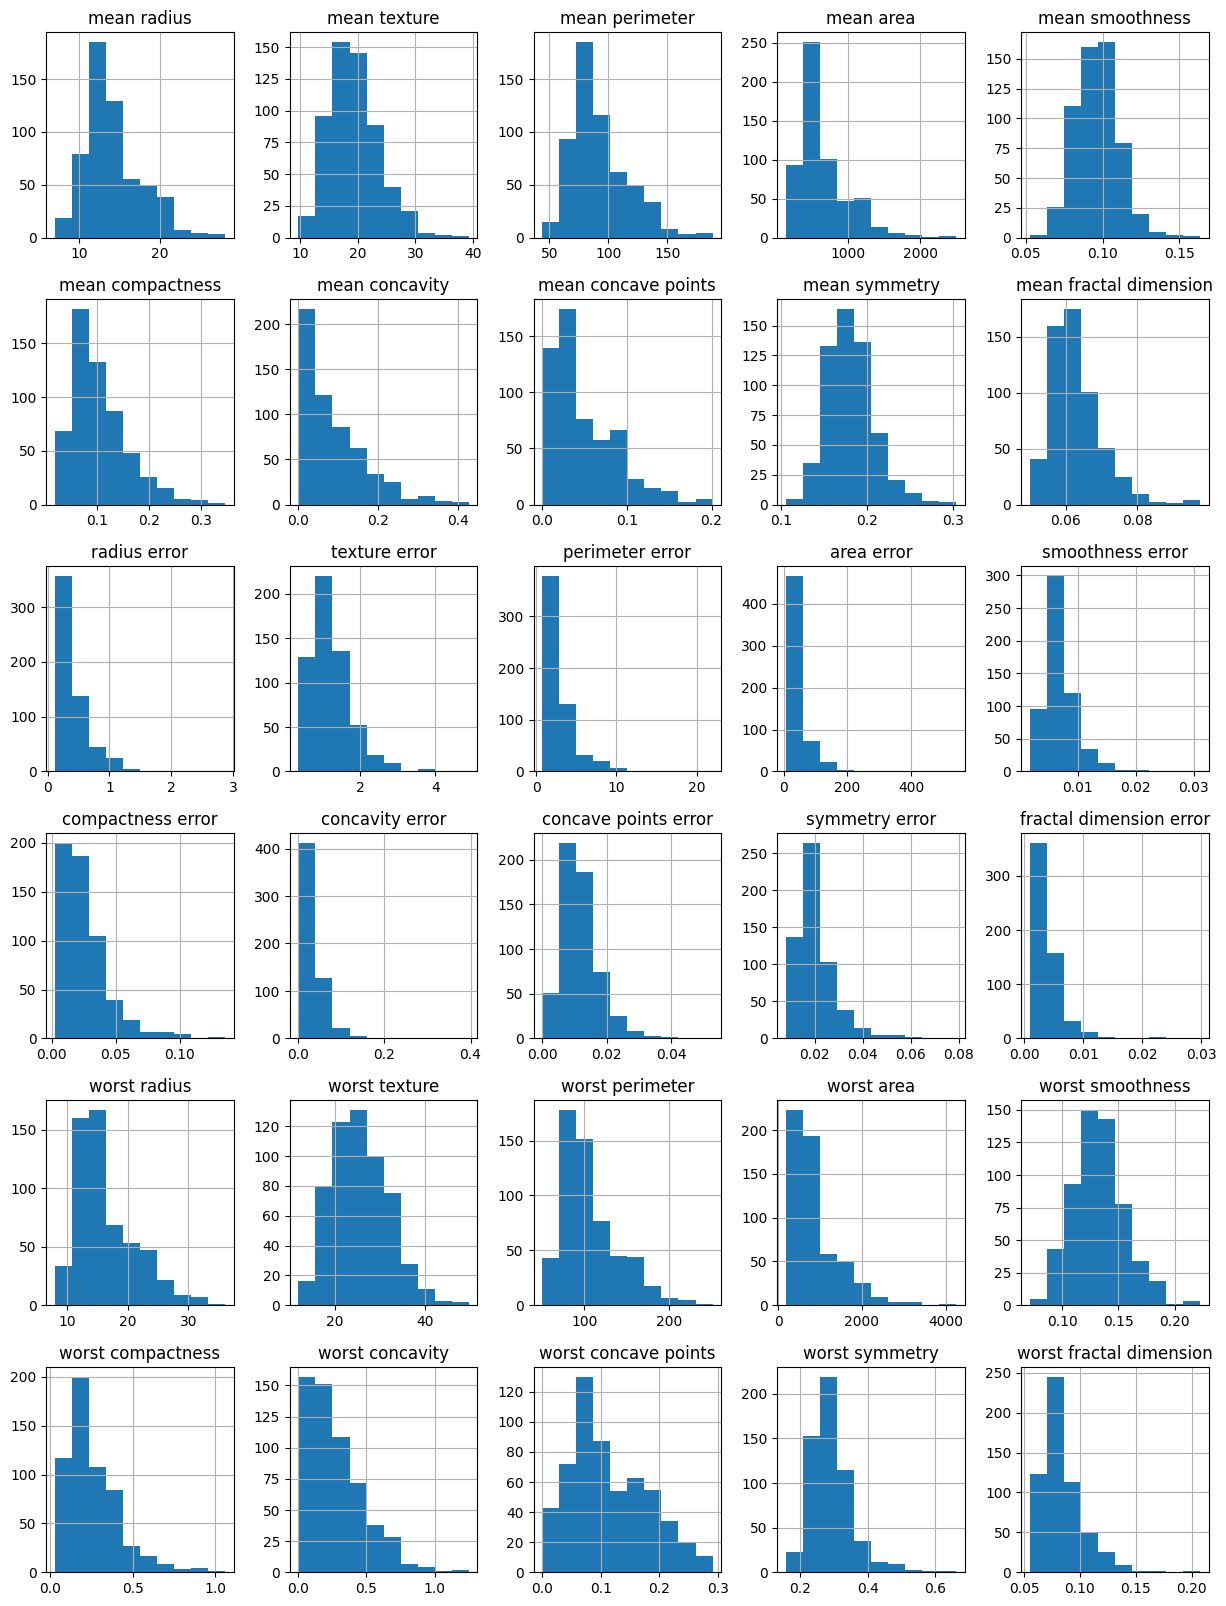

In [8]:
df.hist(figsize=(15,20))

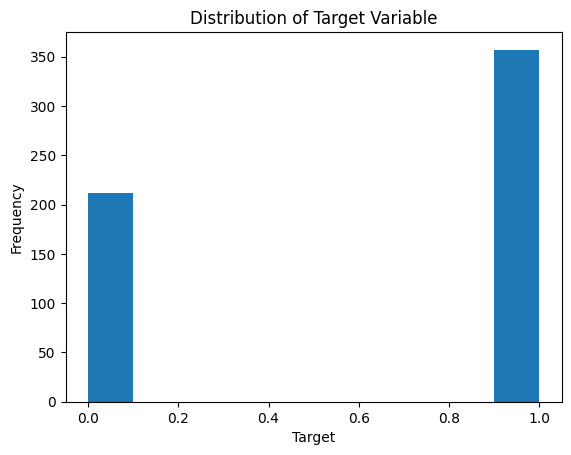

In [9]:
plt.hist(y)
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")
plt.show()

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [11]:
pca_full = PCA().fit(x_scaled)
print(pca_full.explained_variance_ratio_)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


In [12]:
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
cum_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

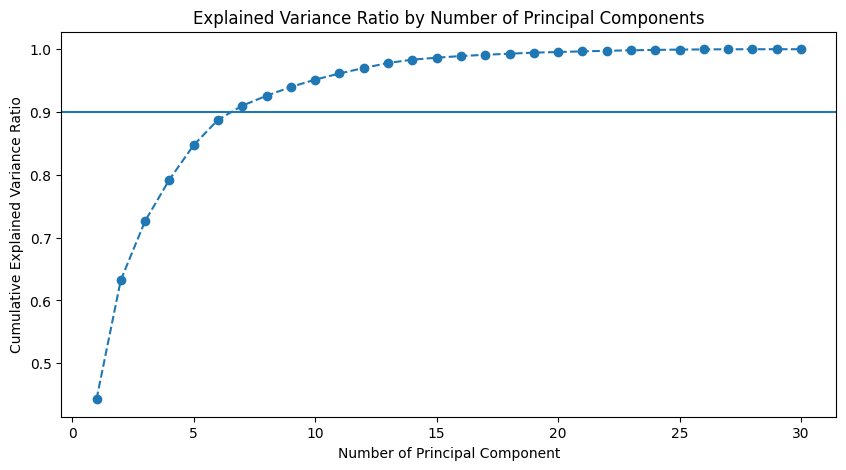

In [13]:
plt.figure(figsize= (10, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),cum_var,marker = 'o', linestyle = '--')
plt.xlabel('Number of Principal Component')
plt.axhline(y=0.9)
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.show()

In [15]:
pca = PCA(n_components=7)# 7 capture 90% of variance
x_pca = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(7)])
pca_df['target']=y
print(pca_df.head())


        PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [24]:
#Logistic Refression
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9824561403508771
0.9859154929577465
[[42  1]
 [ 1 70]]


In [26]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.9758241758241758
Test Score: 0.9824561403508771


In [29]:
# Random Forest
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.956140350877193
0.9714285714285714
[[41  2]
 [ 3 68]]


In [30]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 1.0
Test Score: 0.956140350877193


In [44]:
# for principle components 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9912280701754386
0.9861111111111112
[[42  1]
 [ 0 71]]


In [42]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.9868131868131869
Test Score: 0.9824561403508771


In [33]:
# SVC
model = SVC(kernel='linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9912280701754386
0.9861111111111112
[[42  1]
 [ 0 71]]


In [34]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 0.9428571428571428
Test Score: 0.9912280701754386


In [39]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9473684210526315
0.9577464788732394
[[40  3]
 [ 3 68]]


In [40]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)


Train Score: 1.0
Test Score: 0.9473684210526315


For the Logistic Regression model, Principal Component 7 outperforms Principal Component 2 on unseen data, with a slightly lower training score

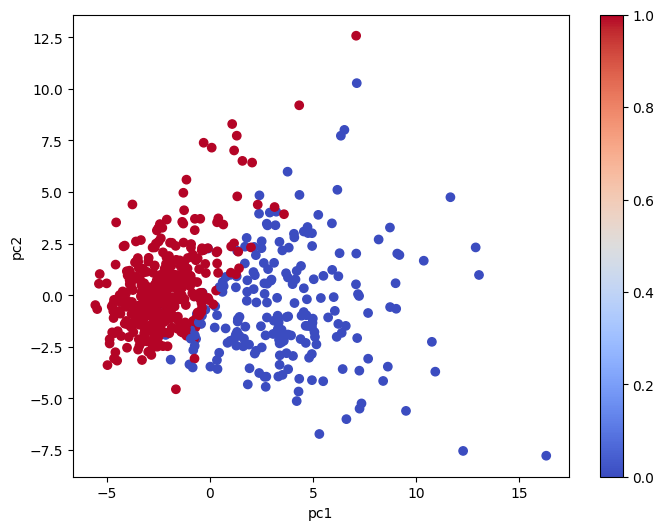

In [47]:
# scatter plot for principle components 2

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='coolwarm')
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.colorbar()
plt.show()